Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Rescaling, Input
import warnings
warnings.filterwarnings('ignore')

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,                      # Path to the root directory
    image_size=(img_height, img_width),  # Resize all images to this size (height, width)
    batch_size=batch_size,               # Number of images to return per batch
    seed=123,                            # Set a random seed for reproducibility
    validation_split=0.2,                # Use 20% of the data for validation
    subset='training'                    # Specify this as the training set (for split)
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,                      # Path to the root directory
    image_size=(img_height, img_width),  # Resize all images to this size (height, width)
    batch_size=batch_size,               # Number of images to return per batch
    seed=123,                            # Set a random seed for reproducibility
    validation_split=0.2,                # Use 20% of the data for validation
    subset='validation'                    # Specify this as the training set (for split)
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

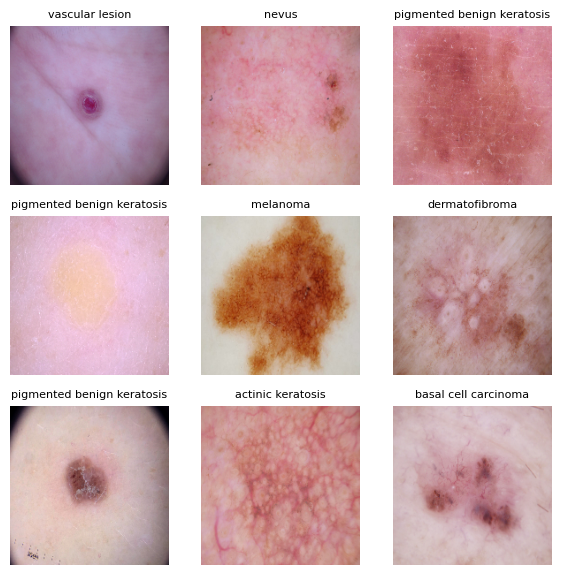

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(7,7))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]], fontsize=8)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9
model = Sequential()

model.add(Input(shape=(img_height, img_width, 3)))
model.add(Rescaling(1./255))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
      
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 180, 180, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,990,249 (15.22 MB)

 Trainable params: 3,990,025 (15.22 MB)

 Non-trainable params: 224 (896.00 B)

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - accuracy: 0.2812 - loss: 5.7672 - val_accuracy: 0.0403 - val_loss: 36.4381
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.4408 - loss: 1.6602 - val_accuracy: 0.0403 - val_loss: 64.2110
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.4884 - loss: 1.4098 - val_accuracy: 0.0403 - val_loss: 67.2543
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 459ms/step - accuracy: 0.5726 - loss: 1.1523 - val_accuracy: 0.0403 - val_loss: 55.7622
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 527ms/step - accuracy: 0.6153 - loss: 1.0396 - val_accuracy: 0.0559 - val_loss: 31.0406
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 588ms/step - accuracy: 0.6666 - loss: 0.9231 - val_accuracy: 0.1655 - val_loss: 13.4191
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 890ms/step - accuracy: 0.7013 - loss: 0.7953 - val_accuracy: 0.2528 - val_loss: 6.6554
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 571ms/step - accuracy: 0.7163 - loss: 0.7383 - va

### Visualizing training results

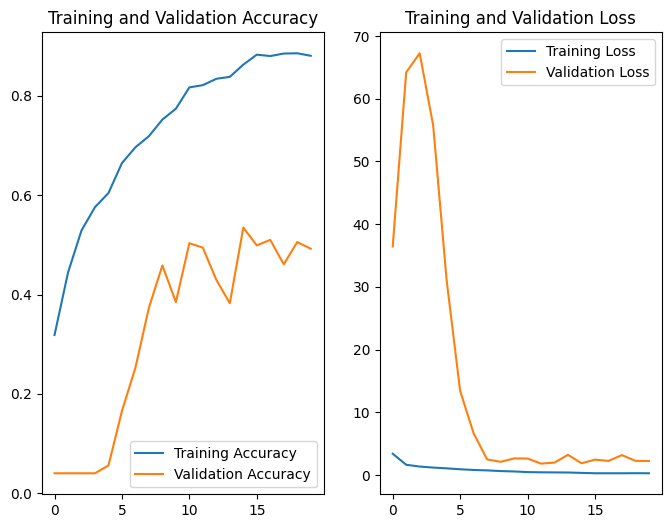

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

There is a large difference between training & validation accuracy indicating a case of overfit. Let us introduce a dropout layer after the 3rd convolution layer, in addition let us also introduce a augmentation layer (consisting of random flip, rotation, translation, zoom, contrast & brightness) so that the model can better learn the underlying patterns

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

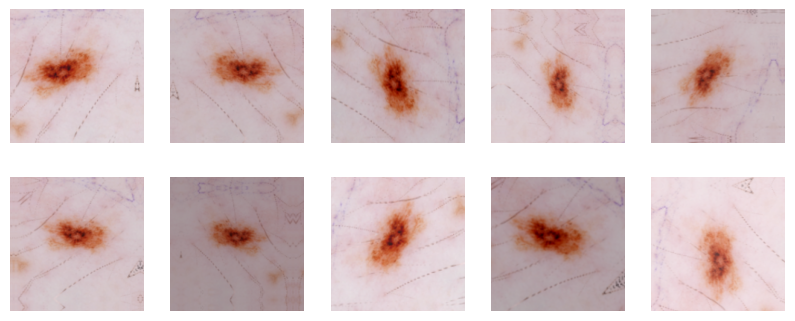

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,4))
for images, labels in train_ds.take(1):
  for i in range(10):
    augmented_images = data_augmentation(images) # Apply data augmentation to the batch of images
    ax = plt.subplot(2,5, i+1)  
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
model = Sequential()

model.add(Input(shape=(img_height, img_width, 3)))
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
      
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 699ms/step - accuracy: 0.2079 - loss: 6.5912 - val_accuracy: 0.2170 - val_loss: 7.5329
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 653ms/step - accuracy: 0.2910 - loss: 1.9452 - val_accuracy: 0.2148 - val_loss: 11.7767
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 648ms/step - accuracy: 0.3376 - loss: 1.8847 - val_accuracy: 0.1991 - val_loss: 14.7981
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 681ms/step - accuracy: 0.3735 - loss: 1.7849 - val_accuracy: 0.2349 - val_loss: 14.1547
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 715ms/step - accuracy: 0.3910 - loss: 1.7024 - val_accuracy: 0.2707 - val_loss: 13.3878
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 689ms/step - accuracy: 0.4281 - loss: 1.5951 - val_accuracy: 0.2774 - val_loss: 8.9928
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 655ms/step - accuracy: 0.4519 - loss: 1.5735 - val_accuracy: 0.3266 - val_loss: 4.6199
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 704ms/step - accuracy: 0.4386 - loss: 1.5723 - val_

### Visualizing the results

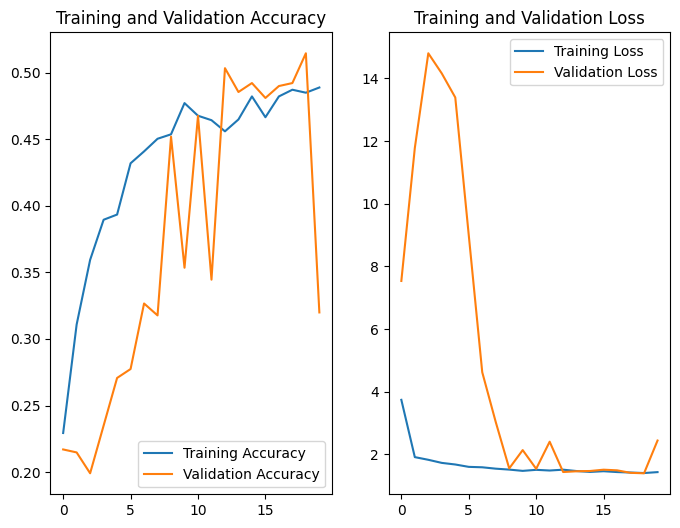

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Difference between training & validation accuracy has reduced significantl indicating no overfit now. But the accuracy is still quite low. To improve it further, let us try to check for any class imbalance and generate more images using augmentation.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [23]:
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


Class=5, n=462 (20.634%)
Class=3, n=438 (19.562%)
Class=1, n=376 (16.793%)
Class=4, n=357 (15.945%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)
Class=0, n=114 (5.092%)
Class=2, n=95 (4.243%)
Class=6, n=77 (3.439%)


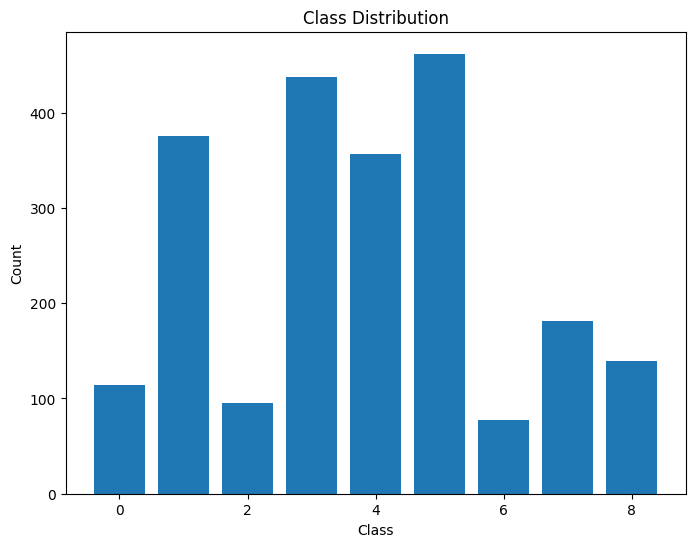

In [24]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable without creating a new column
le = LabelEncoder()
encoded_labels = le.fit_transform(original_df['Label'])

# Get value counts and percentages
class_counts = pd.Series(encoded_labels).value_counts()
class_percentages = class_counts / len(encoded_labels) * 100

# Print the counts and percentages
for label, count in class_counts.items():
    print(f"Class={label}, n={count} ({class_percentages[label]:.3f}%)")

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- As can be seen above, class 6 ('seborrheic keratosis') has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
- Class 5 ('pigmented benign keratosis') dominates the data in terms proportionate number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
#pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset = r"Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x151DFB449B0>: 100%|█████████████████████████████████████████████████████| 500/500 [00:09<00:00, 54.11 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x151DFB44710>: 100%|█████████████████████████████████████████████████████| 500/500 [00:08<00:00, 58.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x151DFADD400>: 100%|█████████████████████████████████████████████████████| 500/500 [00:08<00:00, 56.54 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x151DED2F290>: 100%|███████████████████████████████████████████████████| 500/500 [00:54<00:00,  9.24 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x645 at 0x151DFC8A240>: 100%|███████████████████████████████████| 500/500 [00:48<00:00, 10.26 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x151DFC4D220>: 100%|█████████████████████████████████████████████████████| 500/500 [00:13<00:00, 37.33 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x151DFBDB650>: 100%|████████████████████████████████████████████████████| 500/500 [00:21<00:00, 22.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x151DFBD4B90>: 100%|█████████████████████████████████████████████████████| 500/500 [00:09<00:00, 50.59 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train\\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15159E9DD90>: 100%|█████████████████████████████████████████████████████| 500/500 [00:09<00:00, 52.44 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_174cf303-22c8-48f3-bfc7-266cfea6e1e6.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_21955523-b1f1-4253-9a23-84ed2153a033.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7b7ef4ec-2ecb-4693-899a-eac0a39925c2.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a4d5828a-045f-4dd5-beb2-4fbedf5fb8be.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c104d20f-4f51-4c2f-9b3e-3afa811d3a41.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [32]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
## your code goes here
model = Sequential()

model.add(Input(shape=(img_height, img_width, 3)))
model.add(Rescaling(1./255))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
      
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 151s 577ms/step - accuracy: 0.2706 - loss: 3.8810 - val_accuracy: 0.1114 - val_loss: 13.3702
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 510ms/step - accuracy: 0.4797 - loss: 1.4232 - val_accuracy: 0.2279 - val_loss: 7.3492
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 111s 660ms/step - accuracy: 0.5716 - loss: 1.1234 - val_accuracy: 0.4722 - val_loss: 1.4234
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 822ms/step - accuracy: 0.6511 - loss: 0.9181 - val_accuracy: 0.3318 - val_loss: 2.2012
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 148s 880ms/step - accuracy: 0.7437 - loss: 0.7030 - val_accuracy: 0.4425 - val_loss: 2.1293
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 105s 620ms/step - accuracy: 0.7866 - loss: 0.5666 - val_accuracy: 0.4402 - val_loss: 3.1278
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 103s 612ms/step - accuracy: 0.8248 - loss: 0.4924 - val_accuracy: 0.6548 - val_loss: 1.0805
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 583ms/step - accuracy: 0.8722 - 

#### **Todo:**  Visualize the model results

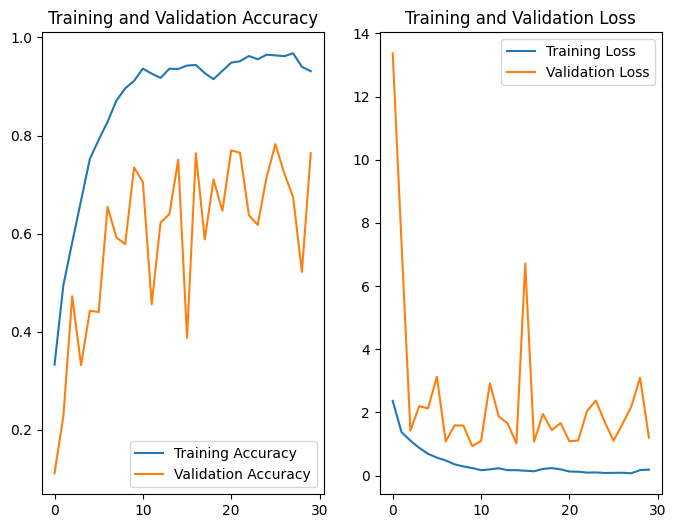

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



After generating more images for training data using augmentation, the validation accuracy has further increased to around 70%. But the training accuracy is still ~90% indicating overfitting. Next, we will try to look at the accuracy of test data.

In [41]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

Found 118 files belonging to 9 classes.


In [42]:
from sklearn.metrics import accuracy_score

# Make predictions (as mentioned earlier)
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)  # Get predictions
    predicted_labels = np.argmax(predictions, axis=1)  # Get the index of the highest prediction score
    y_true.extend(labels.numpy())  # Append true labels
    y_pred.extend(predicted_labels)  # Append predicted labels

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)

# Print accuracy
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
Accuracy on test data: 32.20%


## Another model to reduce overfitting
- Dropout: Introduced another dropout layer.
- L2 Regularization: Applied L2 regularization (kernel_regularizer=l2(0.001)) to each Conv2D and Dense layer
- Early Stopping: Added early stopping to prevent overfitting by monitoring val_los
- Learning Rate: explicitly set a lower learning rate in the optimizer

In [43]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Input layer and scaling
model.add(Input(shape=(img_height, img_width, 3)))
model.add(Rescaling(1./255))

# First conv block
model.add(Conv2D(16, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv block
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third conv block
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Increased dropout for regularization

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(Activation('relu'))
model.add(Dropout(0.25))  # Dropout in Dense layer

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 103s 535ms/step - accuracy: 0.3218 - loss: 2.4694 - val_accuracy: 0.1084 - val_loss: 9.8642
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 578ms/step - accuracy: 0.5657 - loss: 1.5248 - val_accuracy: 0.1403 - val_loss: 6.3345
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 494ms/step - accuracy: 0.7009 - loss: 1.1598 - val_accuracy: 0.5575 - val_loss: 1.7442
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 84s 494ms/step - accuracy: 0.7761 - loss: 0.9588 - val_accuracy: 0.6971 - val_loss: 1.1685
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 460ms/step - accuracy: 0.8261 - loss: 0.8034 - val_accuracy: 0.8092 - val_loss: 0.9298
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 57s 336ms/step - accuracy: 0.8701 - loss: 0.7012 - val_accuracy: 0.8010 - val_loss: 0.9368
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 450ms/step - accuracy: 0.8951 - loss: 0.6401 - val_accuracy: 0.8233 - val_loss: 0.8739
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 462ms/step - accuracy: 0.9160 - loss: 

## Conclusion
- After introducing augmentation, dropouts, L2 Regularization, Early Stopping & a reduced learning rate, we are able to get rid of overfitting to a large extent.
- The final model as shown above is able to achieve a __validation accuracy of around 83%__